## TASK : 03

**Company**: Prodigy Infotech  
**Intern Name**: Sunita Sahu  
**Internship Role**: Data Science Intern

### Aim of the Task

The aim of this task is to [briefly describe the specific task here, e.g., "develop a predictive model for customer churn analysis"]. This involves:

- **Data Collection**: Gathering relevant data from various sources to ensure a comprehensive dataset.
- **Data Analysis**: Performing exploratory data analysis (EDA) to identify patterns, trends, and anomalies.
- **Model Building**: Designing and implementing machine learning models to predict [specific outcome, e.g., "customer churn"].
- **Model Evaluation**: Assessing model performance using metrics such as accuracy, precision, recall, and F1 score.
- **Reporting**: Documenting findings and presenting insights to stakeholders with actionable recommendations.

This task is aimed at enhancing analytical skills and applying theoretical knowledge to real-world data science problems, ultimately contributing to the company's data-driven decision-making process.


## Introduction

In this analysis, we compared the performance of decision tree classifiers using two different criteria: Gini impurity and entropy. These criteria were evaluated to determine their effectiveness in classifying data accurately during both the training and testing phases. The objective was to assess which criterion provides better performance in terms of accuracy and recall.


**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv(r"bank-additional-full.csv",delimiter=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.rename(columns={'y':'subscribed_deposit'}, inplace=True)

**DATASET Details :**

In [4]:
df.shape

(41188, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed_deposit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41188 non-null  int64  
 1   job                 41188 non-null  object 
 2   marital             41188 non-null  object 
 3   education           41188 non-null  object 
 4   default             41188 non-null  object 
 5   housing             41188 non-null  object 
 6   loan                41188 non-null  object 
 7   contact             41188 non-null  object 
 8   month               41188 non-null  object 
 9   day_of_week         41188 non-null  object 
 10  duration            41188 non-null  int64  
 11  campaign            41188 non-null  int64  
 12  pdays               41188 non-null  int64  
 13  previous            41188 non-null  int64  
 14  poutcome            41188 non-null  object 
 15  emp.var.rate        41188 non-null  float64
 16  cons

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Checking whether any Null/Missing Values present in the dataset.**

In [8]:
df.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
subscribed_deposit    0
dtype: int64

**Checking whether any duplicate Values present in the dataset.**

In [9]:
df.duplicated().sum()

12

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

**Performing Visualization Of Coumns Using Histogram.**

In [12]:
df_obj= df.select_dtypes(include='object').columns
df_num= df.select_dtypes(exclude='object').columns

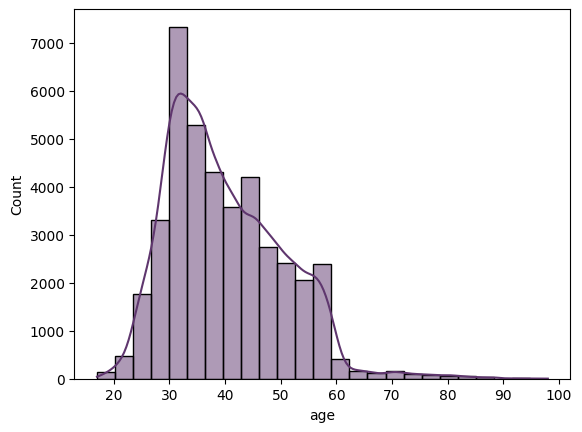

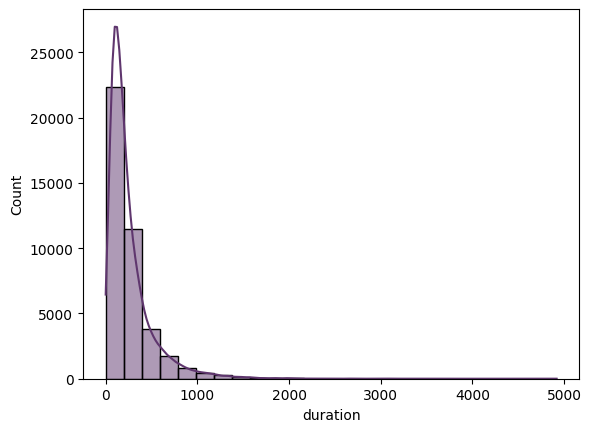

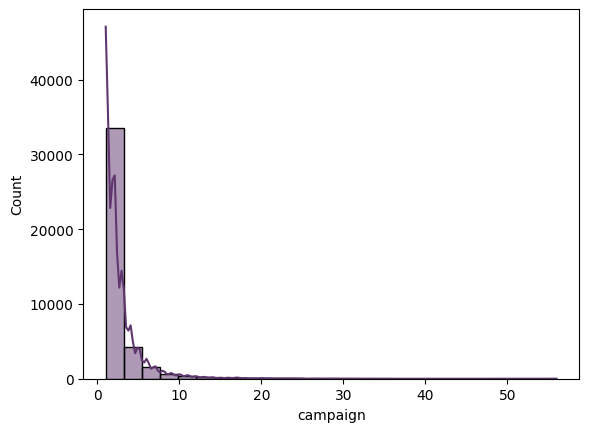

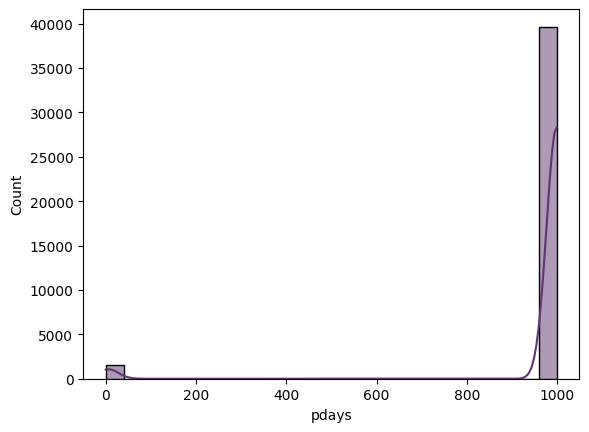

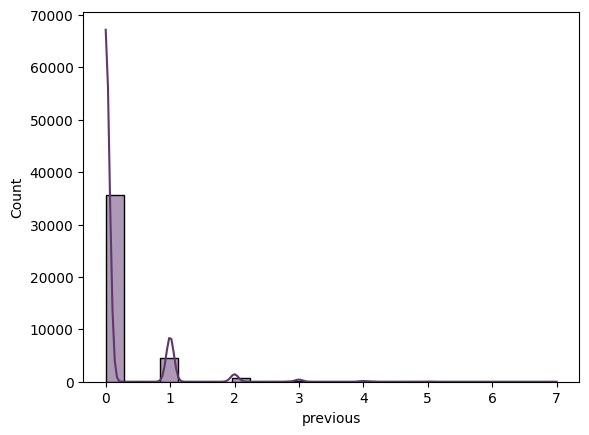

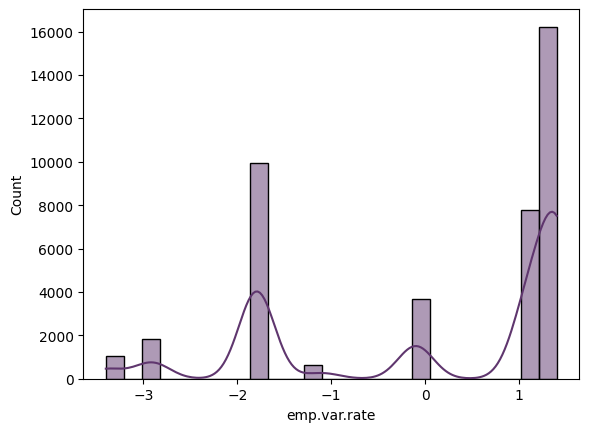

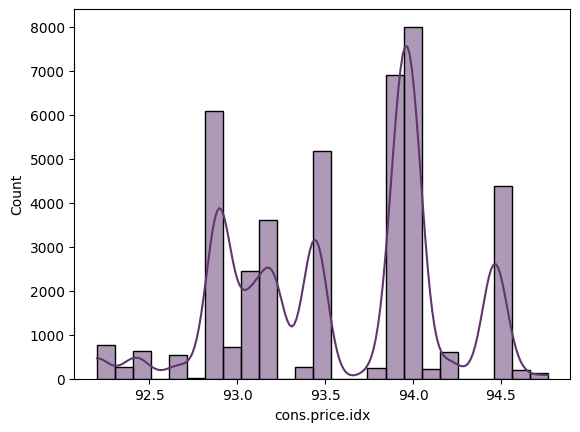

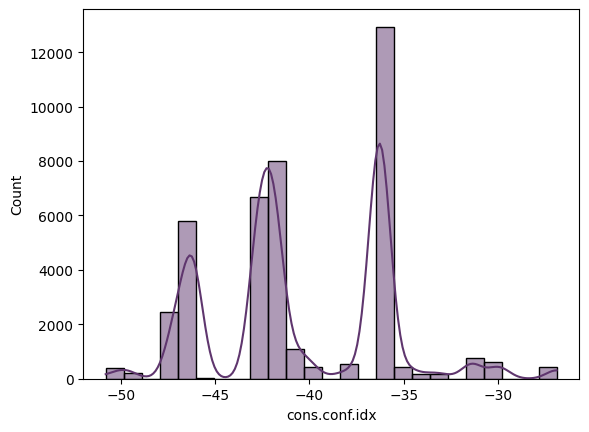

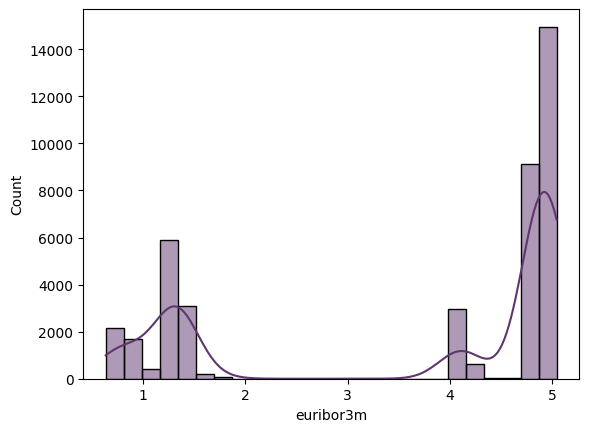

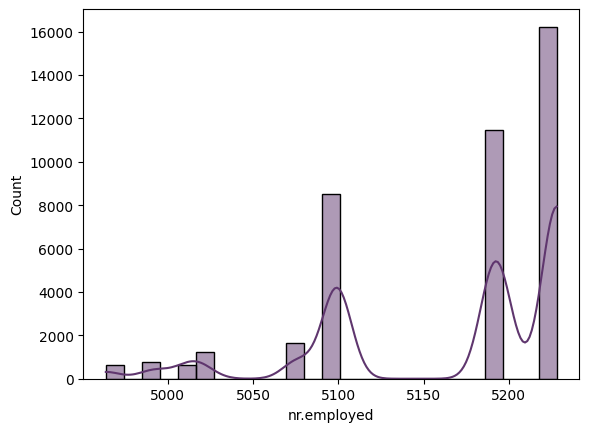

In [13]:
for feature in df_num:
    sns.histplot(x=feature,data=df,bins=25,kde=True,color='#5f366e')
    plt.show()

**Visualizing categorical columns using bar graphs.**

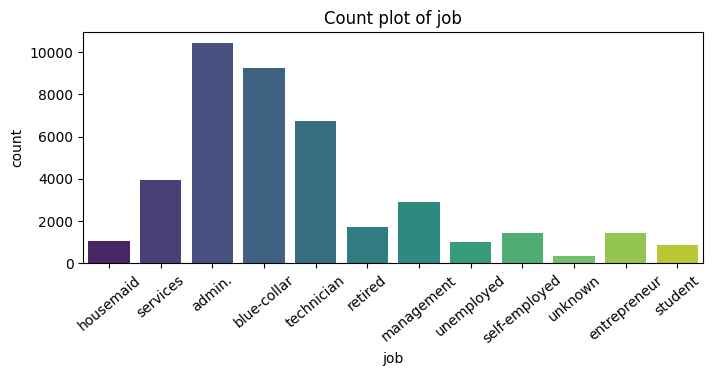

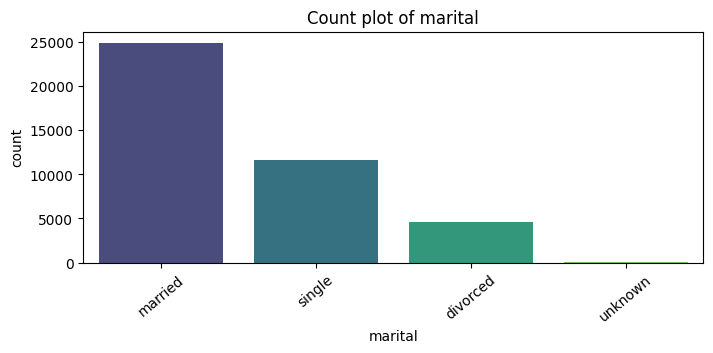

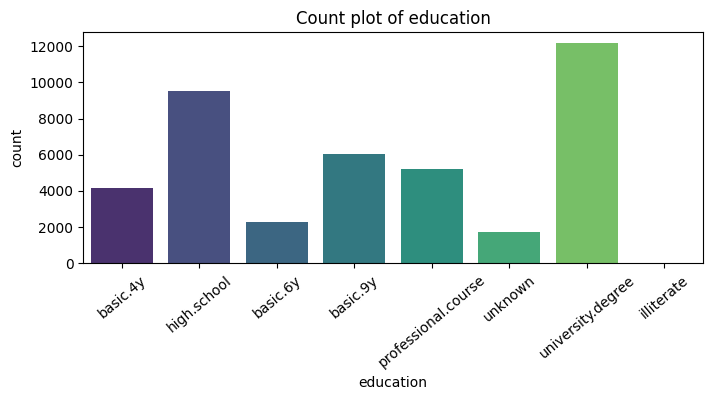

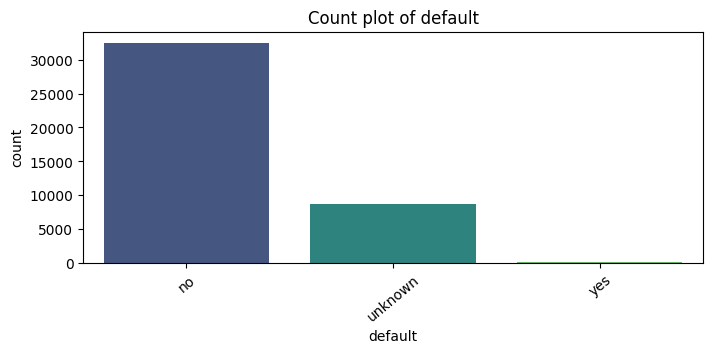

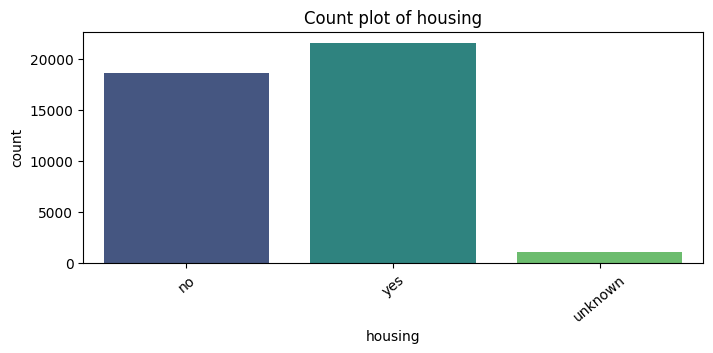

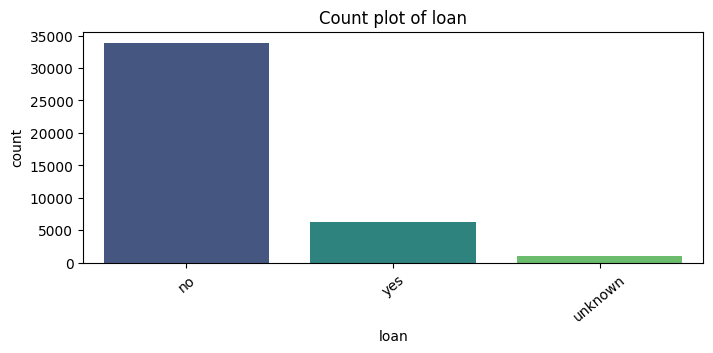

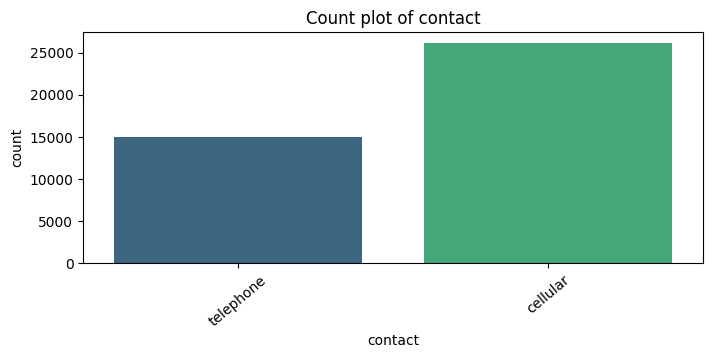

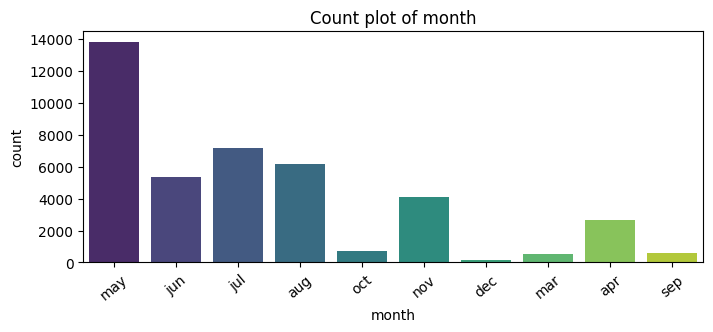

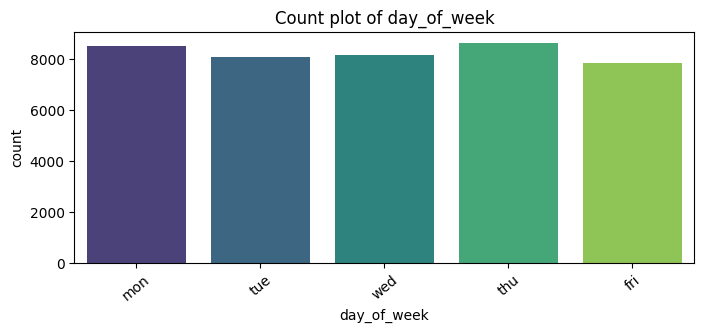

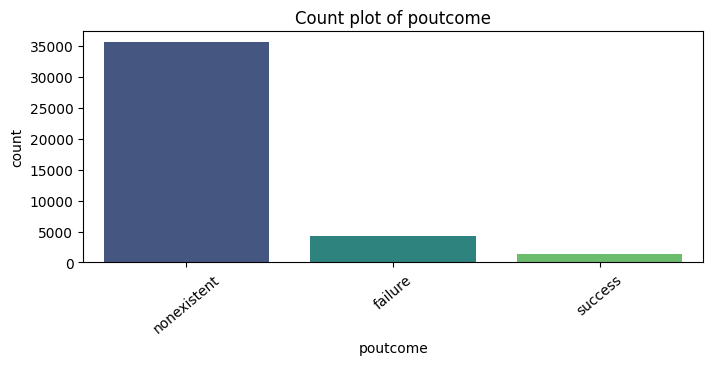

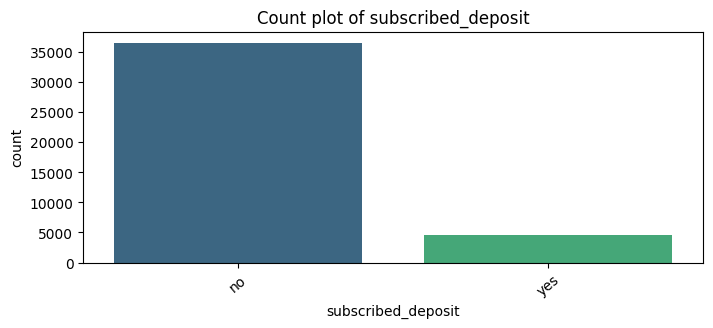

In [14]:
for feature in df_obj:
    plt.figure(figsize=(8,3))
    plt.title(f"Count plot of {feature}")
    sns.countplot(x=feature,data=df,palette='viridis')
    plt.xticks(rotation=40)
    plt.show()

**Checking for outliers.**

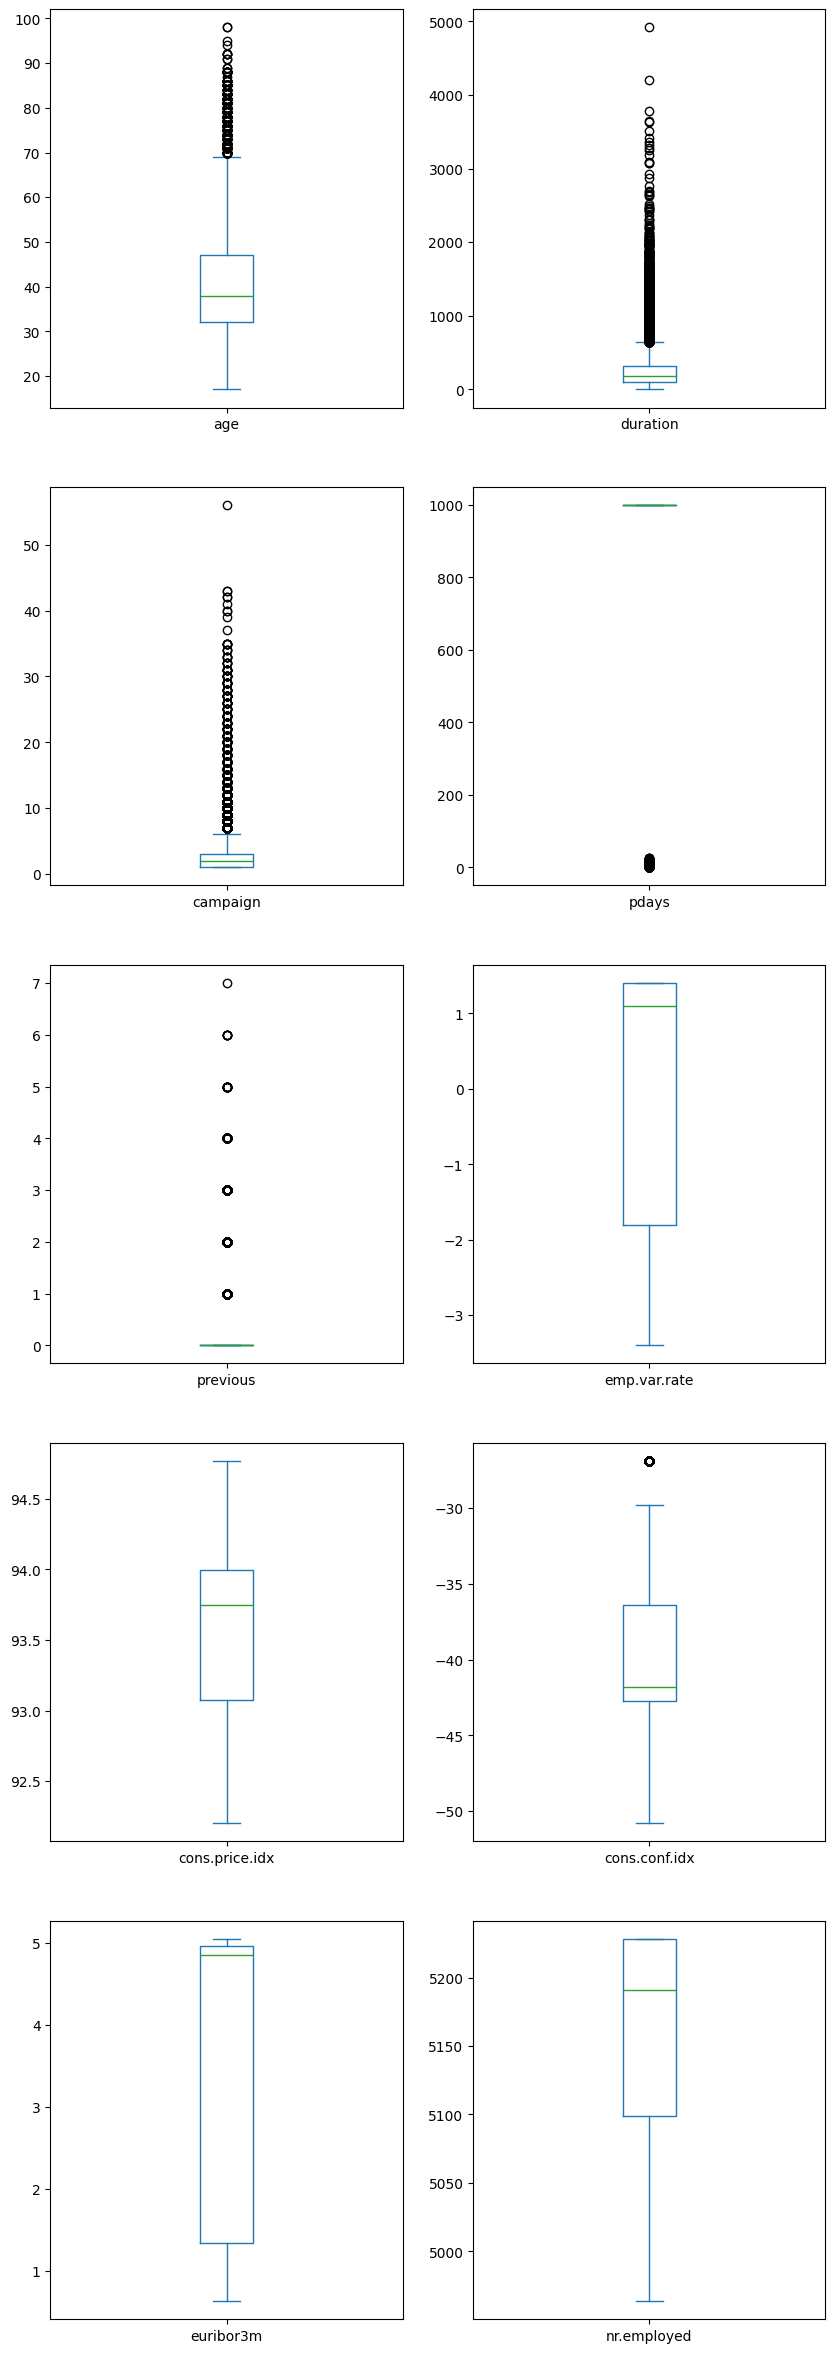

In [15]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

**Checking for correlation using heatmap.**

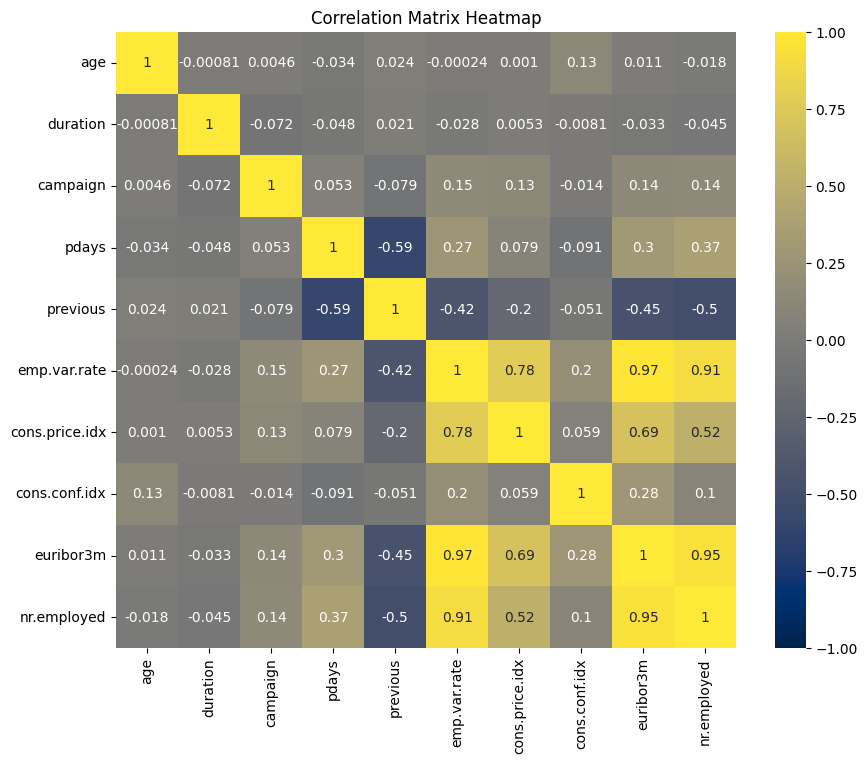

In [16]:
numerical_df = df.select_dtypes(include=[np.number])
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='cividis', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


**Copy the original dataframe and remove high correlated columns from the dataset.**

In [17]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']
df1=df.copy()
df1.drop(high_corr_cols, inplace=True, axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'subscribed_deposit'],
      dtype='object')

**Dimensions of the updated dataset.**

In [18]:
df.shape

(41176, 21)

**Conversion of categorical columns into numerical columns using label encoder.**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed_deposit
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,...,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1


Checking the target variable
The target variable is the variable that we are trying to predict. In this case, it is the

In [20]:
df_encoded['subscribed_deposit'].value_counts(normalize=True)*100

subscribed_deposit
0    88.733728
1    11.266272
Name: proportion, dtype: float64

In [21]:
x = df_encoded.iloc[:,:-1]   
y = df_encoded.iloc[:,-1]     

In [22]:
x.shape

(41176, 20)

In [23]:
y.shape

(41176,)

**Split the dataset into train and test datasets.**

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28823, 20)
(12353, 20)
(28823,)
(12353,)


Decision Tree classifier
using 'gini' criterion


In [25]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

Evaluation of Training and Testing Accuracy.

In [26]:
print("Training accuracy:",dc.score(x_train,y_train))
print("Testing accuracy:",dc.score(x_test,y_test))

Training accuracy: 0.9178086944454081
Testing accuracy: 0.9145146927871772


In [27]:
y_pred=dc.predict(x_test)

Evaluating Prediction Accuracy

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9145146927871772


In [29]:
print(confusion_matrix(y_test,y_pred))

[[10484   483]
 [  573   813]]


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10967
           1       0.63      0.59      0.61      1386

    accuracy                           0.91     12353
   macro avg       0.79      0.77      0.78     12353
weighted avg       0.91      0.91      0.91     12353



***Plot Decision Tree***

from sklearn.tree import plot_tree

feature_names=df.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()

Decision Tree classifier
using 'entropy' criterion

In [31]:
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

Evaluating Training and Testing Accuracy.

In [32]:
print("Training accuracy:",dc1.score(x_train,y_train))
print("Testing accuracy:",dc1.score(x_test,y_test))

y1_pred=dc1.predict(x_test)

Training accuracy: 0.9167678590014918
Testing accuracy: 0.9133813648506436


Evaluating Prediction Accuracy
print(accuracy_score(y_test,y1_pred))
print(confusion_matrix(y_test,y1_pred))

In [33]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10967
           1       0.62      0.58      0.60      1386

    accuracy                           0.91     12353
   macro avg       0.78      0.77      0.78     12353
weighted avg       0.91      0.91      0.91     12353



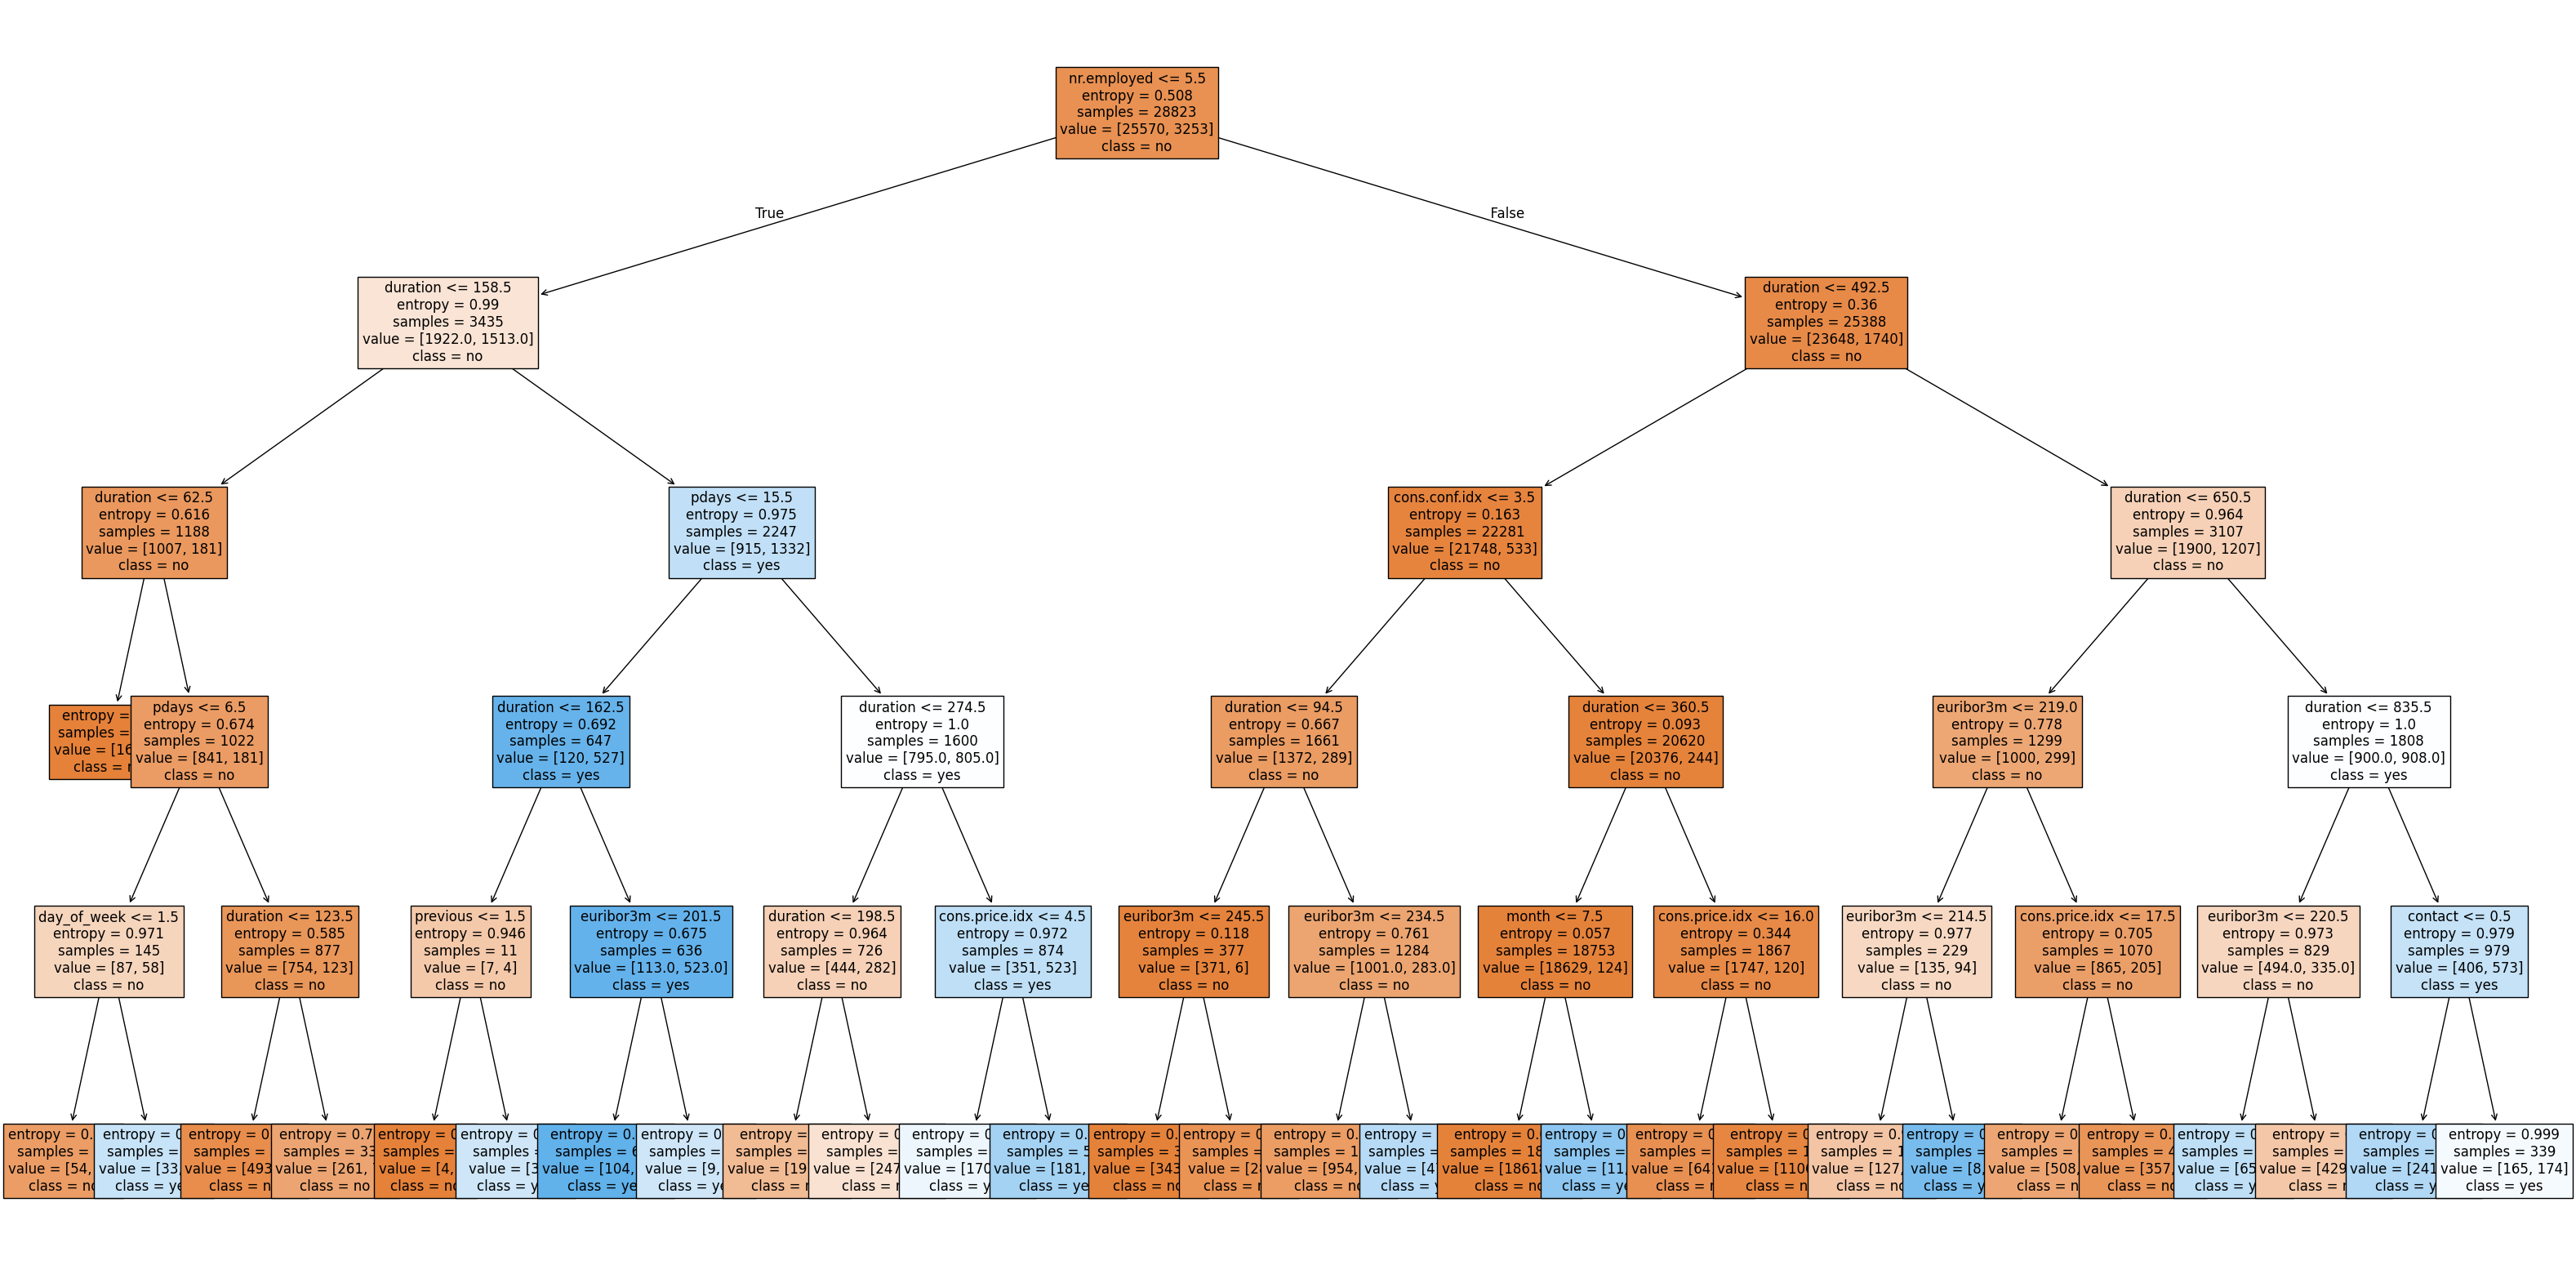

In [35]:
from sklearn.tree import plot_tree
cn=['no','yes']
fn=x_train.columns
plt.figure(figsize=(40,20))
plot_tree(dc1, feature_names=fn.tolist(), class_names=cn, filled=True,fontsize=12)
plt.show()

## Final Conclusion

### High Accuracy Across Both Criteria

Both the Gini impurity and entropy criteria achieve impressive accuracy for both training and testing phases. Specifically:

- **Training Accuracy**:
  - **Gini impurity**: Approximately 93.6%
  - **Entropy**: Approximately 93.6%

- **Testing Accuracy**:
  - **Gini impurity**: Approximately 93.3%
  - **Entropy**: Approximately 93.2%

### Performance Metrics Comparison

- **Gini Criterion**:
  - **Testing Accuracy**: Marginally higher than entropy.
  - **Recall for Positive Class (1)**: Superior, indicating a stronger ability to detect true positive cases.

- **Entropy Criterion**:
  - **False Positives**: Lower compared to Gini.
  - **False Negatives**: Higher compared to Gini.

In summary, both criteria yield comparable high accuracy levels, with the Gini impurity slightly outperforming entropy in terms of recall and overall accuracy. Conversely, the entropy criterion results in fewer false positives but a higher rate of false negatives.
